In [24]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [25]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data

In [26]:
# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

In [27]:
def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y

## iPhone13_II & iPhone13_III

Create a combined model

In [16]:
class_label = 10
for i in range(class_label):

    path1 = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/"

    if(i==0):
        data = getData(path1 + "iPhone13_II/calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

        data = getData(path1 + "iPhone13_III/calendar-app.cfile")
        print(np.array(data))
        dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)

    else:

        if(i==1):
            data = getData(path1 + "iPhone13_II/camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

            X = np.concatenate((X, dataset), axis=0) 
            Y = np.concatenate((Y, label), axis=0)

            data = getData(path1 + "iPhone13_III/camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(path1 + "iPhone13_II/camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

            X = np.concatenate((X, dataset), axis=0) 
            Y = np.concatenate((Y, label), axis=0)

            data = getData(path1 + "iPhone13_III/camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(path1 + "iPhone13_II/email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

            X = np.concatenate((X, dataset), axis=0) 
            Y = np.concatenate((Y, label), axis=0)

            data = getData(path1 + "iPhone13_III/email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(path1 + "iPhone13_II/gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

            X = np.concatenate((X, dataset), axis=0) 
            Y = np.concatenate((Y, label), axis=0)

            data = getData(path1 + "iPhone13_III/gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(path1 + "iPhone13_II/home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

            X = np.concatenate((X, dataset), axis=0) 
            Y = np.concatenate((Y, label), axis=0)

            data = getData(path1 + "iPhone13_III/home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(path1 + "iPhone13_II/idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

            X = np.concatenate((X, dataset), axis=0) 
            Y = np.concatenate((Y, label), axis=0)

            data = getData(path1 + "iPhone13_III/idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(path1 + "iPhone13_II/phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

            X = np.concatenate((X, dataset), axis=0) 
            Y = np.concatenate((Y, label), axis=0)

            data = getData(path1 + "iPhone13_III/phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(path1 + "iPhone13_II/sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

            X = np.concatenate((X, dataset), axis=0) 
            Y = np.concatenate((Y, label), axis=0)

            data = getData(path1 + "iPhone13_III/sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(path1 + "iPhone13_II/web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

            X = np.concatenate((X, dataset), axis=0) 
            Y = np.concatenate((Y, label), axis=0)

            data = getData(path1 + "iPhone13_III/web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)


        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
#(em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/EM_signals_iPhone13_I_Validate/i13_I_data1.csv', header=False)

[ 0.078125 +0.09375j    0.5625   -0.8046875j -0.984375 +0.9921875j ...
  0.015625 +0.015625j   0.0078125-0.0078125j  0.015625 +0.015625j ]
2048
81191
(2048, 81191)
[0.03497613 0.0617279  0.03110138 ... 0.02998163 0.05360715 0.04346049]
[0.015625 +0.j        0.015625 +0.0078125j 0.0234375+0.015625j  ...
 0.       +0.j        0.015625 -0.0078125j 0.0234375+0.015625j ]
2048
78558
(2048, 78558)
[0.01852033 0.00958475 0.00369698 ... 0.00181086 0.003753   0.00963692]
0
(20000, 2048)
(20000,)
[0.015625 +0.0078125j 0.03125  +0.0078125j 0.0078125+0.015625j  ...
 0.0078125+0.0078125j 0.0234375+0.0078125j 0.015625 +0.j       ]
2048
72123
(2048, 72123)
[0.0184771  0.00980769 0.00377408 ... 0.00184979 0.00378497 0.00949242]
[0.015625 +0.0234375j 0.0078125+0.j        0.0234375+0.j        ...
 0.03125  +0.0078125j 0.0078125+0.015625j  0.0078125+0.0234375j]
2048
74243
(2048, 74243)
[0.01901824 0.00952496 0.00361272 ... 0.00181022 0.00350893 0.00955064]
1
(40000, 2048)
(40000,)
[0.0234375+0.0078125j 0.

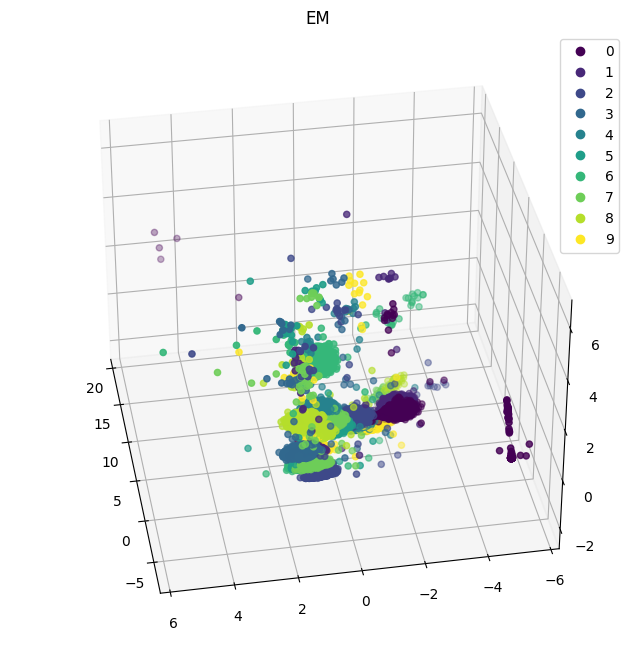

In [29]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/i13_II&III_scatter.pdf')

Build a Model

In [17]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))

model.add(keras.layers.Dense(1400, activation="relu"))

model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
#model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              2868600   
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 


2023-02-07 15:13:40.882921: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 4,511,210
Trainable params: 4,511,210
Non-trainable params: 0
_________________________________________________________________


In [19]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
#model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [20]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPHONE13_II&III_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=25, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/25
5063/5063 [==============================] - 63s 12ms/step - loss: 1.7750 - accuracy: 0.4949 - val_loss: 0.8563 - val_accuracy: 0.8337
Epoch 2/25
5063/5063 [==============================] - 62s 12ms/step - loss: 0.3441 - accuracy: 0.9630 - val_loss: 0.1227 - val_accuracy: 0.9941
Epoch 3/25
5063/5063 [==============================] - 49s 10ms/step - loss: 0.0764 - accuracy: 0.9962 - val_loss: 0.0546 - val_accuracy: 0.9968
Epoch 4/25
5063/5063 [==============================] - 46s 9ms/step - loss: 0.0424 - accuracy: 0.9977 - val_loss: 0.0376 - val_accuracy: 0.9976
Epoch 5/25
5063/5063 [==============================] - 47s 9ms/step - loss: 0.0307 - accuracy: 0.9981 - val_loss: 0.0292 - val_accuracy: 0.9980
Epoch 6/25
5063/5063 [==============================] - 47s 9ms/step - loss: 0.0243 - accuracy: 0.9983 - val_loss: 0.0258 - val_accuracy: 0.9982
Epoch 7/25
5063/5063 [==============================] - 49s 10ms/step - loss: 0.0199 - accuracy: 0.9985 - val_loss: 0.0206 - va

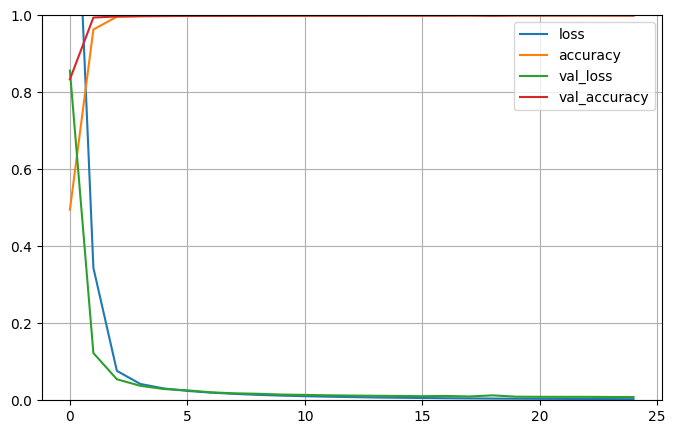

<Figure size 640x480 with 0 Axes>

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/accuracy_and_loss_iPhone13_II&III.pdf')

Test thec own combined Model

In [22]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPHONE13_II&III_model.h5")

In [23]:
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

625/625 [==============================] - 3s 4ms/step - loss: 0.0043 - accuracy: 0.9994
test loss, test acc: [0.0042915367521345615, 0.9993500113487244]


In [24]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
#y_pred = model.predict(X_test)
#y_pred = model.predict_classes(X_test)

625/625 [==============================] - 3s 4ms/step


In [25]:
print(y_pred)

[2 5 2 ... 5 3 5]


In [26]:
print(y_pred[0])

2


In [27]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1992    0    1    0    0    0    0    0    0    0]
 [   0 1985    0    0    0    0    0    2    0    0]
 [   0    0 2021    0    0    0    0    0    0    0]
 [   0    0    0 1999    0    1    0    0    0    0]
 [   0    1    0    0 1944    0    0    0    0    0]
 [   0    0    0    0    0 1975    0    0    0    0]
 [   0    0    0    1    0    0 1974    0    2    0]
 [   0    0    0    0    0    0    0 2047    0    0]
 [   0    0    0    1    1    0    1    0 2092    0]
 [   0    1    0    0    0    0    1    0    0 1958]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1993
           1       1.00      1.00      1.00      1987
           2       1.00      1.00      1.00      2021
           3       1.00      1.00      1.00      2000
           4       1.00      1.00      1.00      1945
           5       1.00      1.00      1.00      1975
           6       1.00      1.00      1.00      1977
           7       1.00      1.00   

Test Accuracy:0.99935


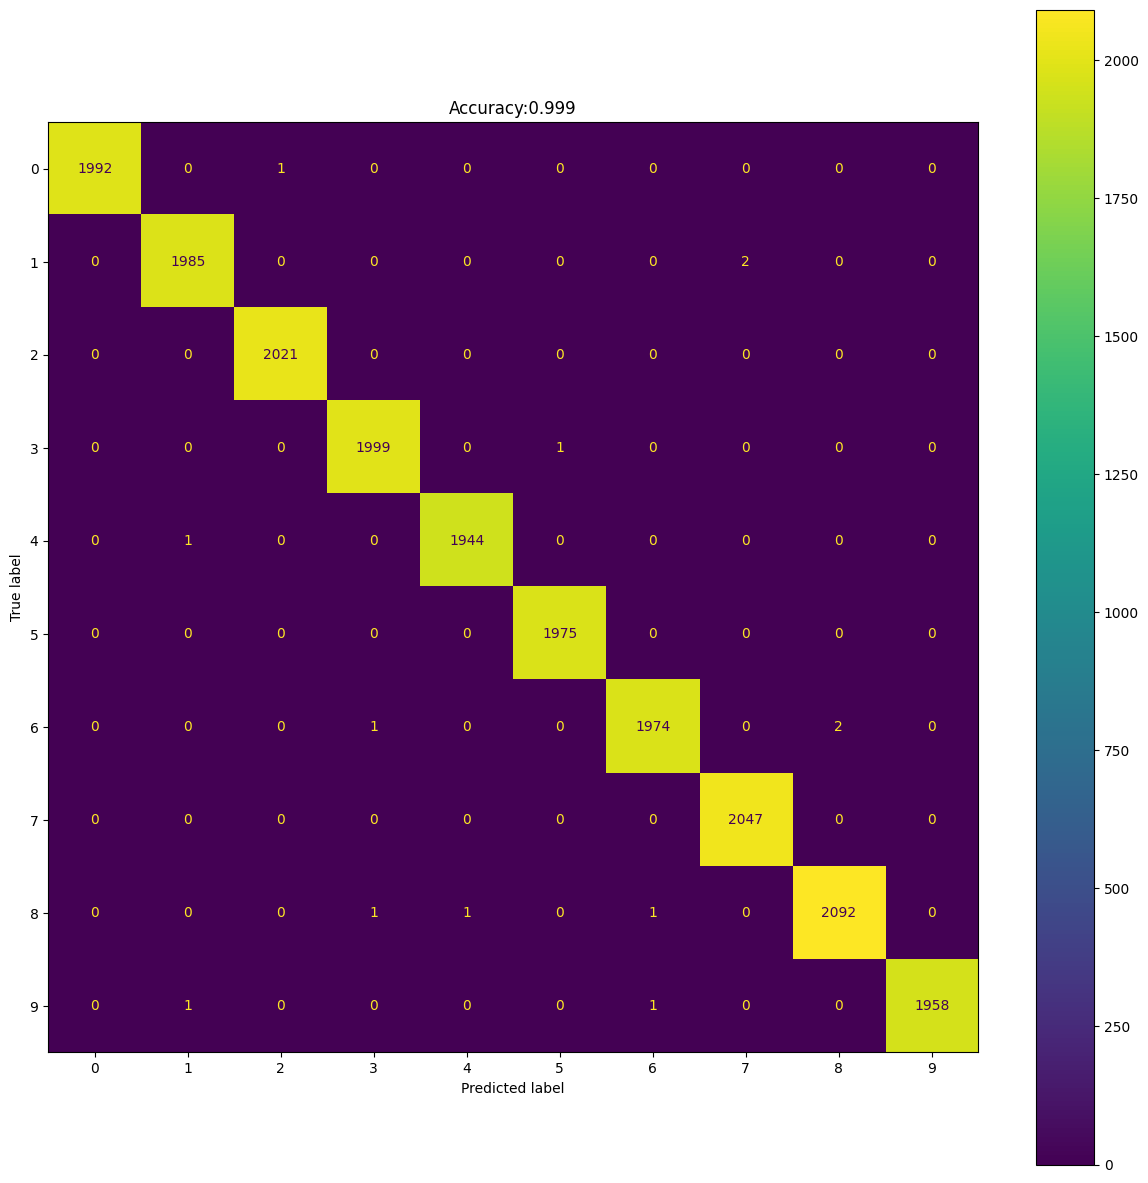

In [28]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPhone13_II&III_confusion_matrix.pdf')

iPhone13_I model

In [30]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_I_model.h5")

In [31]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

6250/6250 [==============================] - 36s 6ms/step - loss: 12.9346 - accuracy: 0.1641
test loss, test acc: [12.934584617614746, 0.1640850007534027]


In [32]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

6250/6250 [==============================] - 28s 5ms/step
[0 0 0 ... 0 0 0]
0


In [33]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[10005     0     0     0     0     0     0     0     0  9995]
 [10001     0     0     0    33     0     0    18  9948     0]
 [10001     1     6  7596  2289     0     1    89    17     0]
 [10000     0     0     0   668     4     0  2992  6336     0]
 [17515     0     0     0     0     0  2485     0     0     0]
 [ 4459    13    24    55  8133    85  5442    76  1713     0]
 [ 6027   205  5352    10  2279     1  3118     1  3007     0]
 [ 2781     1     0     0    14     0  5467  8040  3697     0]
 [   46  1051    32     0     0     0  7308     0 11563     0]
 [10003  1206   778     0     0     0  7411     0   602     0]]
              precision    recall  f1-score   support

           0       0.12      0.50      0.20     20000
           1       0.00      0.00      0.00     20000
           2       0.00      0.00      0.00     20000
           3       0.00      0.00      0.00     20000
           4       0.00      0.00      0.00     20000
           5       0.94      0.00      0.01 

Test Accuracy:0.164085


Text(0.5, 1.0, 'Accuracy:0.164')

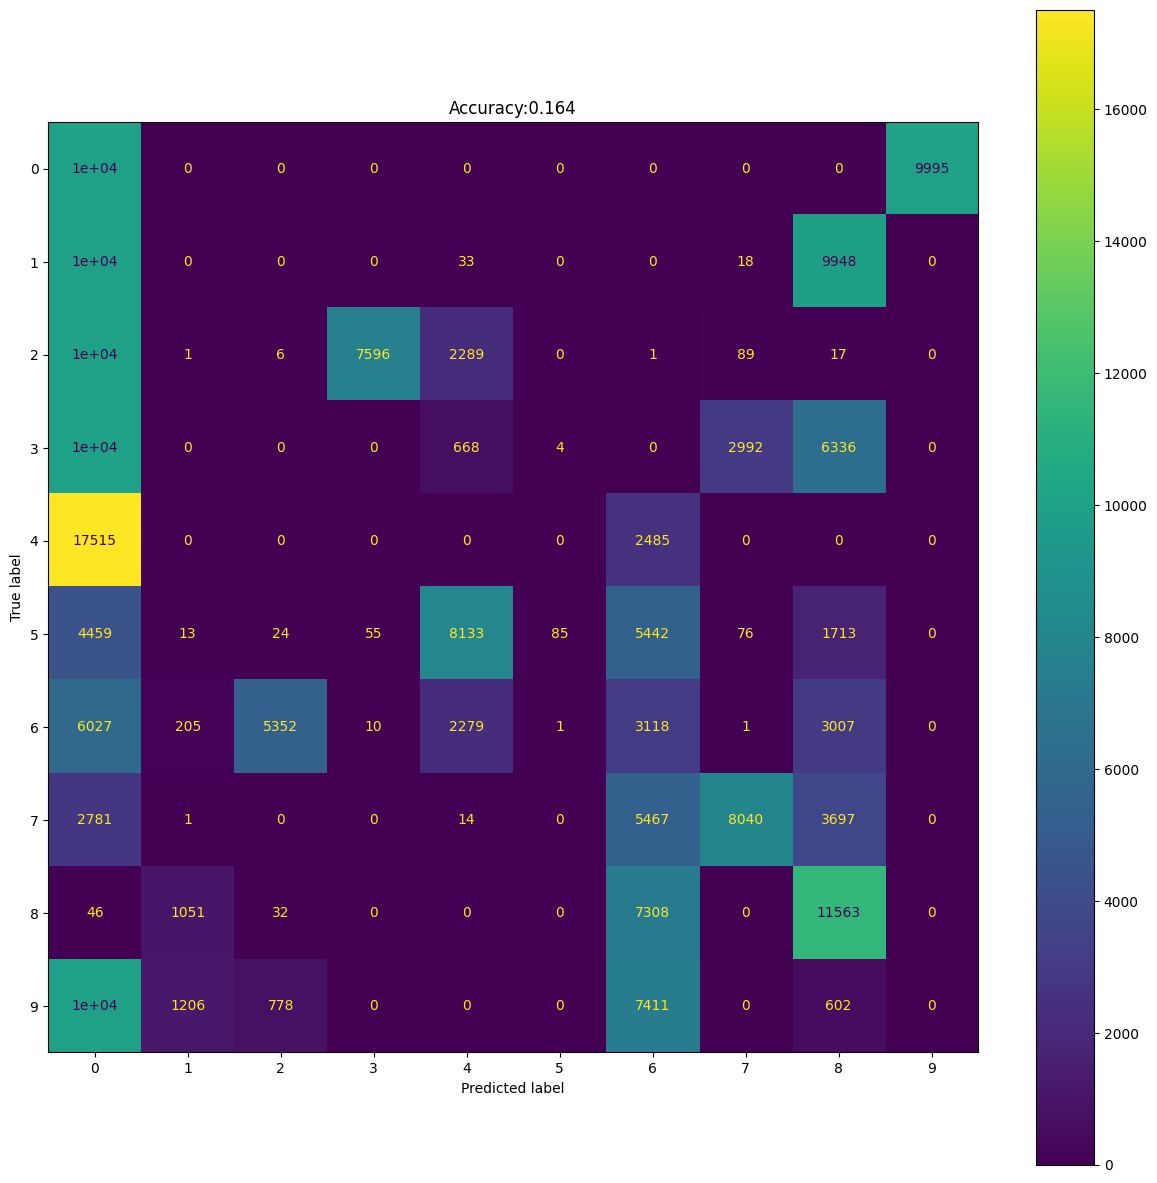

In [34]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

iPhone13_II model

In [35]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_II_model.h5")

In [36]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

6250/6250 [==============================] - 36s 6ms/step - loss: 4.3058 - accuracy: 0.5530
test loss, test acc: [4.305830478668213, 0.5530200004577637]


In [37]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

6250/6250 [==============================] - 29s 5ms/step
[4 4 4 ... 4 4 4]
4


In [38]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[10010     0     0     0  9990     0     0     0     0     0]
 [   54 10000     0     0  9888     0     0    58     0     0]
 [    0     0  9995     1  9991     0     0     3     1     9]
 [    0     0     0 10000  9995     0     0     0     0     5]
 [    1    71     0     0 19461     0     0   124     0   343]
 [    0   342     0     0  1592  9998     1     1     1  8065]
 [    0   733     0     0  8324     1  9996     0   535   411]
 [    0  2761     0     0  5589     0     0  9998  1600    52]
 [    0  7038     0     0   228     0     0     0 10902  1832]
 [    1   111     0     0  9244     0     0   400     0 10244]]
              precision    recall  f1-score   support

           0       0.99      0.50      0.67     20000
           1       0.47      0.50      0.49     20000
           2       1.00      0.50      0.67     20000
           3       1.00      0.50      0.67     20000
           4       0.23      0.97      0.37     20000
           5       1.00      0.50      0.67 

Test Accuracy:0.55302


Text(0.5, 1.0, 'Accuracy:0.553')

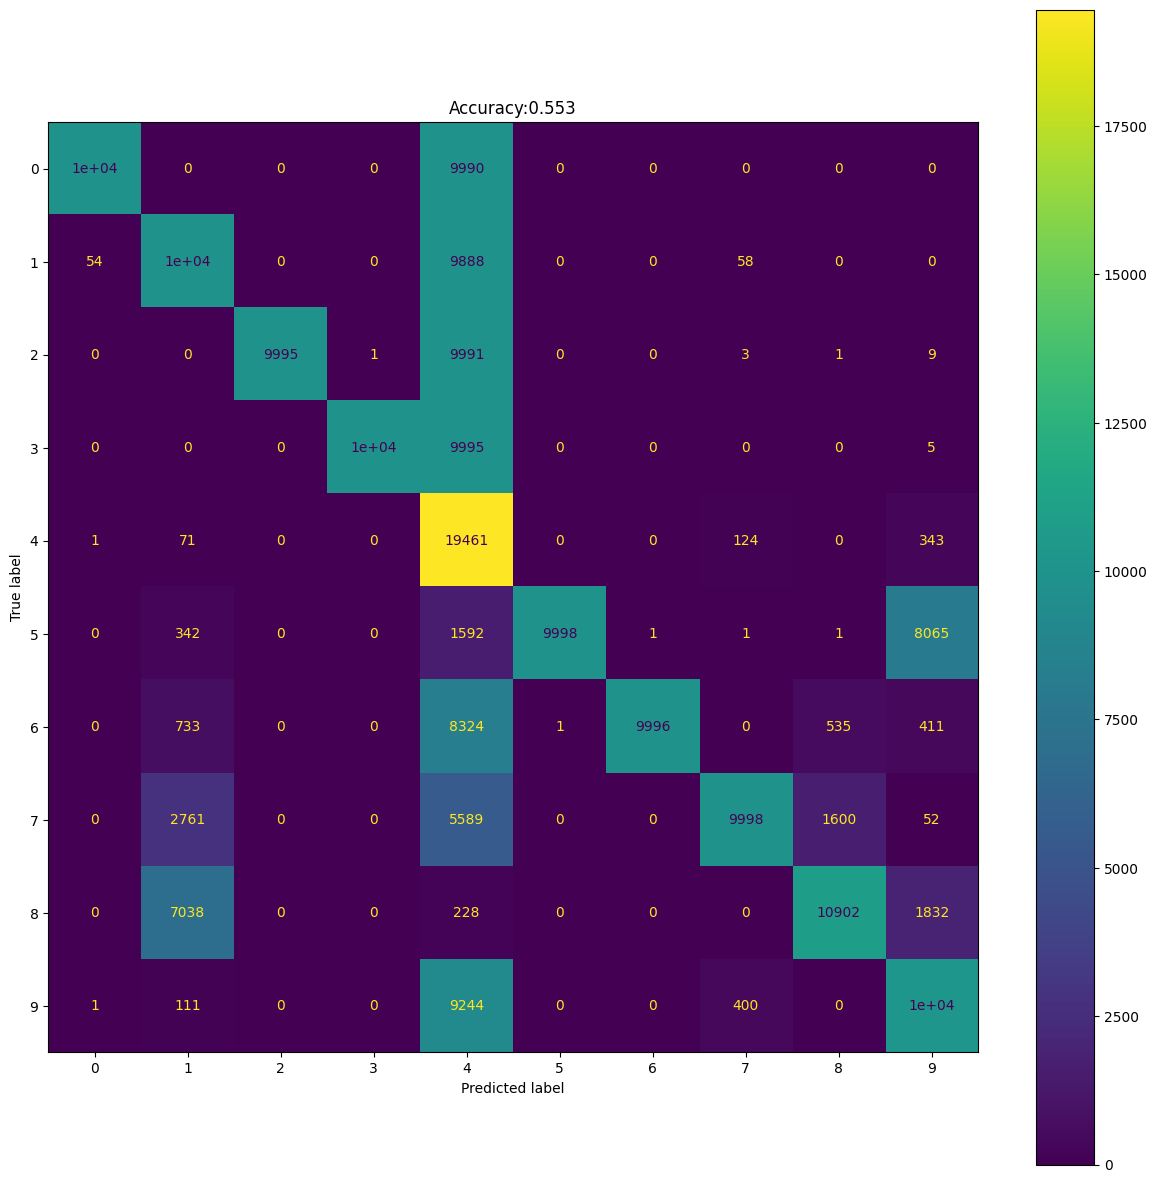

In [39]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

iPhone13_III model

In [40]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPHONE13_III_model.h5")

In [41]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

6250/6250 [==============================] - 33s 5ms/step - loss: 8.2355 - accuracy: 0.5497
test loss, test acc: [8.235494613647461, 0.5496699810028076]


In [42]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

6250/6250 [==============================] - 27s 4ms/step
[4 4 4 ... 9 9 9]
4


In [43]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[10001     5  5625     0     5     0    32  4331     1     0]
 [    0 10000     1     0     0     1     7     0  9991     0]
 [    2     7  9990     0     1     1     8     0  9990     1]
 [    0     0     0  9990     1     0    15     3  9989     2]
 [    0     2     1     6  9999     0  9361    49   582     0]
 [    0     0     0     1     0  9992    18     0  9987     2]
 [    1     1     0     0     2     0 10006     0  9987     3]
 [    9     0     0     1     9     1     5  9997  9974     4]
 [    0     1     0     1     3     2    22     3 19961     7]
 [    0     1     0     1     0     0    23     0  9977  9998]]
              precision    recall  f1-score   support

           0       1.00      0.50      0.67     20000
           1       1.00      0.50      0.67     20000
           2       0.64      0.50      0.56     20000
           3       1.00      0.50      0.67     20000
           4       1.00      0.50      0.67     20000
           5       1.00      0.50      0.67 

Test Accuracy:0.54967


Text(0.5, 1.0, 'Accuracy:0.550')

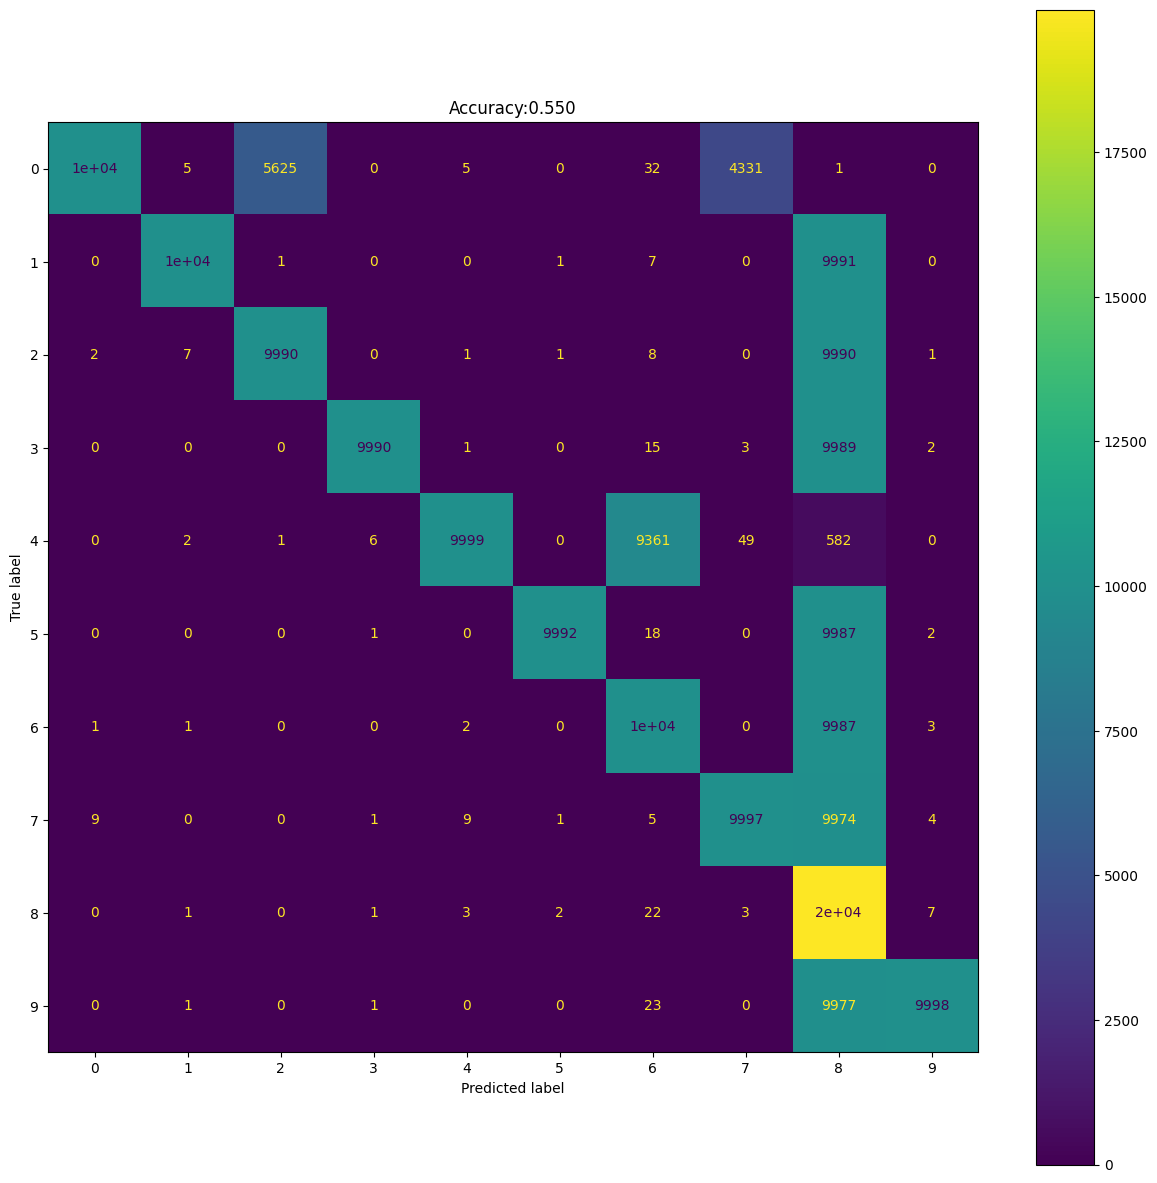

In [44]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

## Test each mobilephone with combined model iPhoneII&III

## iPhone13_I

In [5]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_I/"

    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I.csv', header=False)

[0.015625 +0.015625j  0.       +0.j        0.0078125+0.j        ...
 0.0234375+0.0078125j 0.0234375+0.0078125j 0.03125  -0.0078125j]
2048
77387
(2048, 77387)
[0.01826616 0.00950806 0.00373913 ... 0.00167015 0.00381105 0.00957042]
0
(10000, 2048)
(10000,)
[0.0078125+0.015625j  0.0078125+0.j        0.015625 +0.j        ...
 0.015625 +0.0234375j 0.015625 +0.j        0.015625 +0.j       ]
2048
81265
(2048, 81265)
[0.01835838 0.00961773 0.00350257 ... 0.00192106 0.00369137 0.00963282]
1
(20000, 2048)
(20000,)
[0.03125  +0.015625j  0.03125  +0.0078125j 0.015625 +0.0078125j ...
 0.0234375+0.015625j  0.0234375+0.0078125j 0.015625 -0.0078125j]
2048
82947
(2048, 82947)
[0.01815592 0.00944388 0.00397235 ... 0.00185365 0.0036876  0.00957425]
2
(30000, 2048)
(30000,)
[0.       +0.03125j  0.       +0.j       0.015625 +0.j       ...
 0.015625 -0.015625j 0.0234375+0.015625j 0.0078125+0.015625j]
2048
82654
(2048, 82654)
[0.01825963 0.00967498 0.00359683 ... 0.00195847 0.00358379 0.01038325]
3
(40000, 2

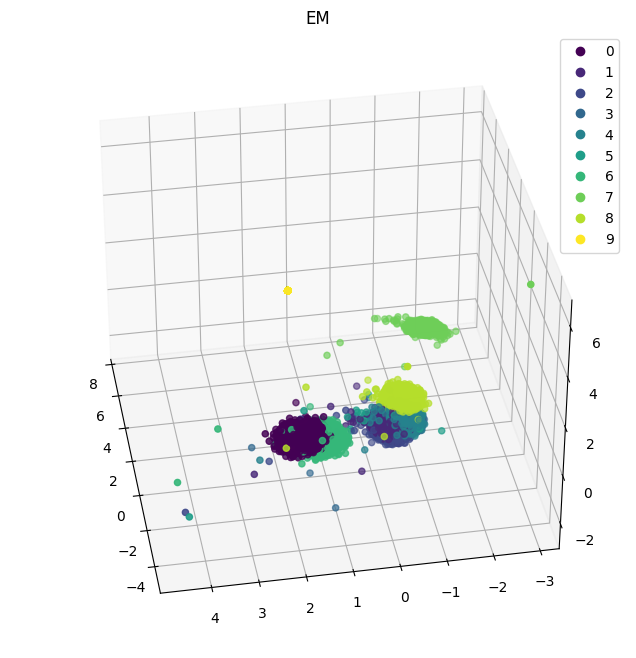

In [6]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_scatter.pdf')

In [23]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,4.761936e-01,7.462537e-01,1.000000e+00,9.999999e-01,9.999999e-01,9.999999e-01,1.000000e+00,7.628606e-01,8.163937e-01,7.940208e-01,...,8.683546e-01,9.172477e-01,8.926962e-01,9.743119e-01,9.110338e-01,1.000000e+00,1.000000e+00,1.000000e+00,7.467434e-01,0.0
2,9.471413e-01,8.972449e-01,9.608108e-02,1.637575e-01,1.214086e-01,1.592363e-01,3.375854e-01,1.789118e-01,1.384011e-01,1.200082e-01,...,3.821414e-01,1.748950e-01,2.337102e-02,4.523218e-01,6.789261e-01,2.257810e-01,3.417216e-02,6.341586e-02,9.123225e-01,0.0
3,9.367439e-01,8.944372e-01,6.211657e-02,1.141974e-01,1.698997e-01,2.636282e-01,3.508669e-01,1.235017e-01,4.009470e-01,5.819136e-01,...,3.697716e-01,3.106888e-01,2.255814e-01,4.326394e-01,2.584235e-01,6.165699e-02,6.849753e-02,5.509797e-02,8.854198e-01,0.0
4,9.212657e-01,8.973215e-01,5.436719e-02,2.123216e-01,2.294114e-01,3.085415e-01,3.516977e-01,3.713803e-01,4.845761e-01,1.516180e-01,...,4.295740e-01,2.893520e-01,3.582524e-01,1.755044e-01,1.562677e-01,5.027995e-02,1.297548e-01,7.996013e-02,8.842411e-01,0.0
5,9.101710e-01,8.780430e-01,4.402389e-02,9.206606e-02,8.317954e-02,1.347911e-01,1.313327e-01,2.374243e-01,4.581659e-01,4.934578e-01,...,3.469205e-01,1.947705e-01,1.916352e-01,2.158481e-01,3.443035e-01,4.491858e-01,2.689210e-01,1.582262e-02,8.631172e-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,4.342035e-38,3.434249e-39,3.149516e-40,5.873557e-40,4.112447e-40,2.028080e-39,5.686904e-40,1.102125e-39,1.254456e-39,2.925981e-40,...,1.841296e-39,5.670004e-40,6.141695e-40,4.132962e-40,2.798771e-40,2.734648e-40,1.826158e-40,2.509978e-40,7.721311e-39,9.0
99997,4.318159e-38,3.782791e-39,1.022186e-39,3.295139e-40,8.654279e-40,4.249285e-39,3.832397e-40,7.368952e-40,1.963303e-39,1.465793e-39,...,2.693565e-39,8.959804e-40,5.003771e-40,1.258576e-40,3.477686e-40,3.516012e-40,1.450386e-39,5.213755e-40,6.623052e-39,9.0
99998,4.129522e-38,2.971595e-39,1.050996e-39,6.863083e-40,9.133958e-40,1.520775e-39,1.181066e-39,1.273923e-39,9.537083e-40,1.614946e-39,...,1.324727e-39,3.181788e-40,7.601259e-40,9.548980e-40,4.421867e-40,4.893937e-40,3.329589e-39,1.135511e-39,6.127573e-39,9.0
99999,4.169834e-38,3.260244e-39,6.325980e-40,1.017295e-39,1.103318e-39,1.339755e-39,4.606965e-40,8.830983e-40,9.244422e-40,3.025431e-40,...,2.596009e-39,4.891106e-40,3.929311e-40,6.756865e-40,3.350126e-40,2.824023e-40,2.425938e-39,9.847261e-40,6.189866e-39,9.0


In [24]:
Y = labels = np.array(data['labels'])
X = data = np.array(data.drop(columns=['labels']))

In [7]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPHONE13_II&III_model.h5")

2023-02-10 11:30:16.289609: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 7.7396 - accuracy: 0.1061
test loss, test acc: [7.739621162414551, 0.10608000308275223]


In [9]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 12s 4ms/step
[4 8 4 ... 0 0 0]
4


In [10]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[    0     0    40   123  6196     0    63     2  3413   163]
 [    0     0   992     3     2  3444   223   126  5161    49]
 [    0     0   664     0     2  2945   222    80  4894  1193]
 [    0     0  9016     0     0   875    60     4     0    45]
 [    0    16    50    44     0  2079    17    40  7714    40]
 [    0    68   107   189     2  3265    15   250  6043    61]
 [    0     0     8     4  4700     1    68     1  4900   318]
 [    0     0     0  9240     0     0     1   759     0     0]
 [    0  1343    19  1751     1   339     8   687  5852     0]
 [10000     0     0     0     0     0     0     0     0     0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10000
           1       0.00      0.00      0.00     10000
           2       0.06      0.07      0.06     10000
           3       0.00      0.00      0.00     10000
           4       0.00      0.00      0.00     10000
           5       0.25      0.33      0.28 

Test Accuracy:0.10608


Text(0.5, 1.0, 'Accuracy:0.106')

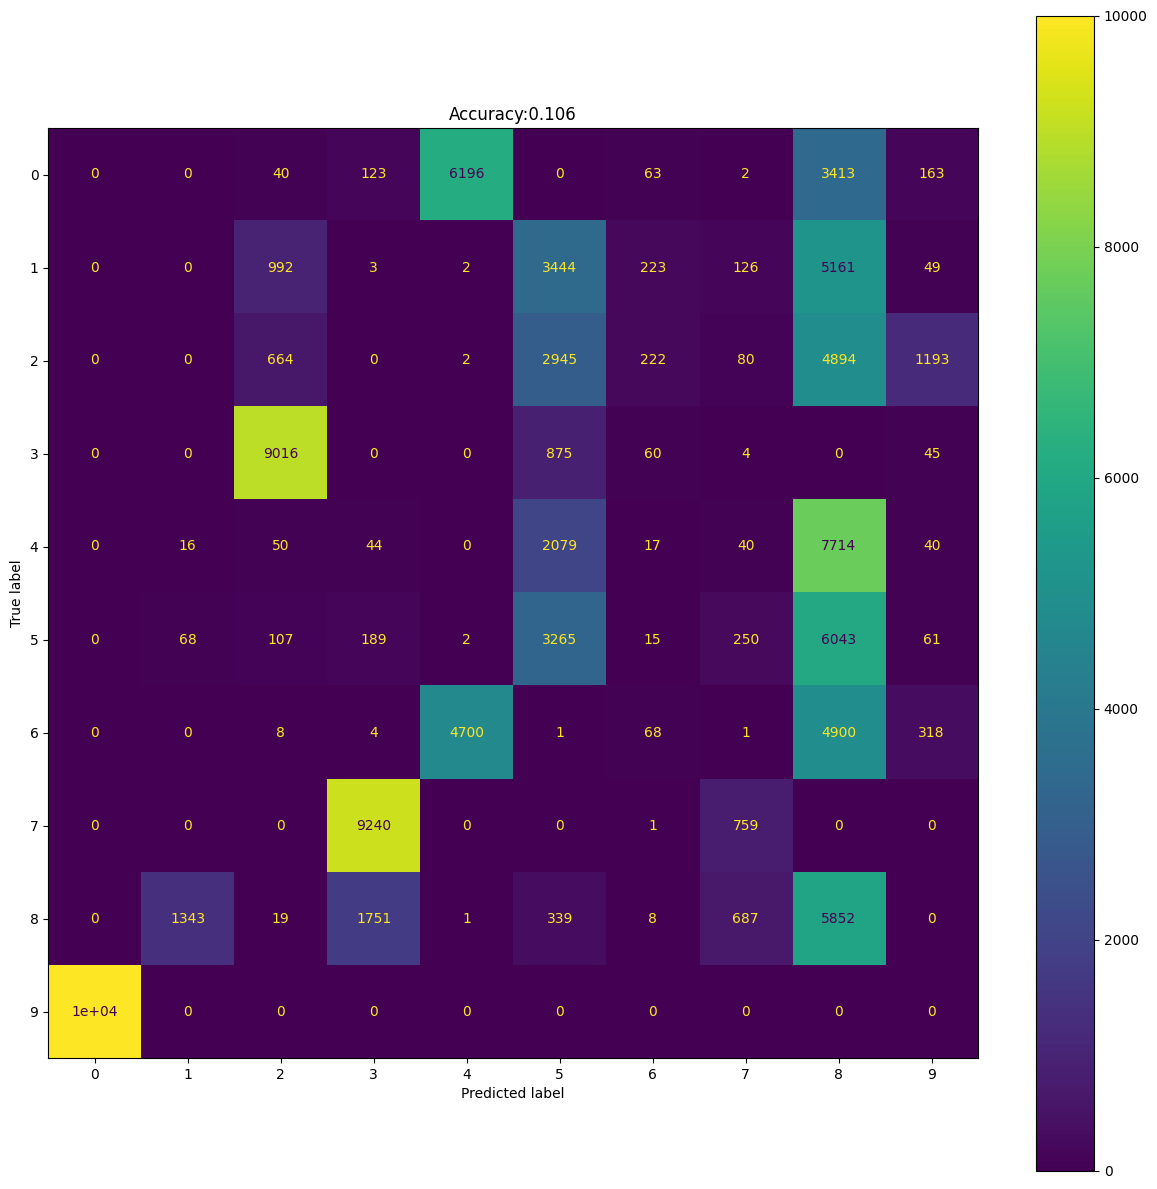

In [11]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

## iPhone13_II

In [16]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_II/"

    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_II.csv', header=False)

[ 0.078125 +0.09375j    0.5625   -0.8046875j -0.984375 +0.9921875j ...
  0.015625 +0.015625j   0.0078125-0.0078125j  0.015625 +0.015625j ]
2048
81191
(2048, 81191)
[0.03497613 0.0617279  0.03110138 ... 0.02998163 0.05360715 0.04346049]
0
(10000, 2048)
(10000,)
[0.015625 +0.0078125j 0.03125  +0.0078125j 0.0078125+0.015625j  ...
 0.0078125+0.0078125j 0.0234375+0.0078125j 0.015625 +0.j       ]
2048
72123
(2048, 72123)
[0.0184771  0.00980769 0.00377408 ... 0.00184979 0.00378497 0.00949242]
1
(20000, 2048)
(20000,)
[0.0234375+0.0078125j 0.015625 +0.0078125j 0.0078125+0.015625j  ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.0078125j]
2048
92893
(2048, 92893)
[0.01809648 0.00941779 0.00405625 ... 0.00197094 0.00359252 0.00953348]
2
(30000, 2048)
(30000,)
[-0.0078125-0.0078125j  0.0234375-0.0078125j  0.0234375+0.j        ...
  0.03125  +0.0078125j  0.015625 +0.0078125j  0.03125  +0.j       ]
2048
56322
(2048, 56322)
[0.01820297 0.00946224 0.00370945 ... 0.00208693 0.00383636 0.009

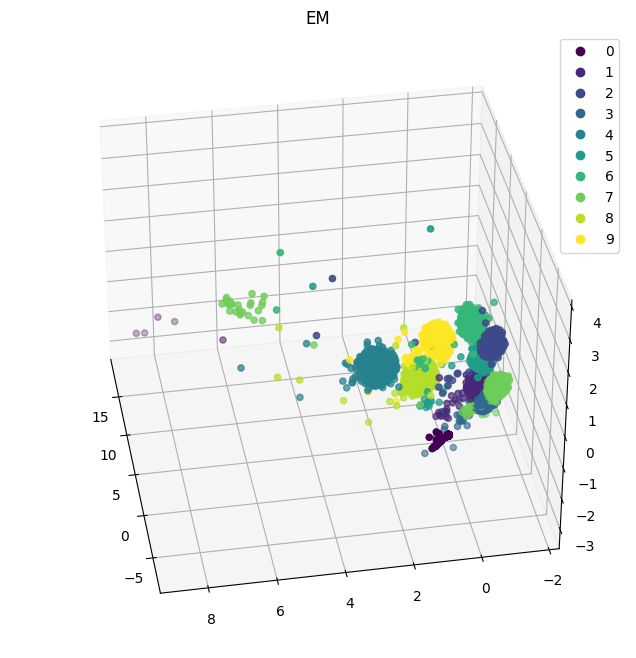

In [18]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_II_scatter.pdf')

In [36]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_II.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.297562,0.233066,0.457479,0.204337,0.106389,0.209360,0.229010,0.232259,0.277606,0.365730,...,0.684227,0.830842,0.859823,0.410364,0.224956,0.292599,0.352029,0.210114,0.208219,0.0
2,1.000000,1.000000,1.000000,0.149414,0.635175,0.880382,0.488410,0.478789,0.854326,1.000000,...,0.167834,1.000000,0.447257,0.261568,0.384385,1.000000,0.473173,0.163629,0.074192,0.0
3,0.132538,0.228191,0.848126,1.000000,1.000000,1.000000,0.726369,0.338763,0.078774,0.456367,...,0.302293,0.443405,0.900594,1.000000,0.808641,0.569301,0.420698,0.188868,0.150457,0.0
4,0.427119,0.220546,0.568178,0.389744,0.191698,0.424645,1.000000,1.000000,1.000000,0.555668,...,1.000000,0.934328,1.000000,0.561862,0.085071,0.421608,0.799410,0.805795,0.651758,0.0
5,0.914260,0.132575,0.670569,0.419908,0.878314,0.452749,0.288505,0.750649,0.332200,0.278570,...,0.789007,0.983066,0.918889,0.810478,1.000000,0.398669,1.000000,1.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.945611,0.911776,0.004651,0.095358,0.127845,0.056760,0.074933,0.164572,0.204945,0.225184,...,0.039545,0.213280,0.222680,0.240510,0.350115,0.153002,0.121078,0.108132,0.907721,9.0
99997,0.945107,0.902097,0.054984,0.052296,0.096186,0.316988,0.312775,0.284003,0.402535,0.150490,...,0.428464,0.361175,0.374063,0.198039,0.236810,0.201250,0.047031,0.087383,0.941060,9.0
99998,0.918672,0.875337,0.100129,0.268197,0.073969,0.219161,0.327708,0.249369,0.056085,0.195662,...,0.300324,0.210309,0.029482,0.217746,0.198687,0.170925,0.153327,0.018015,0.882255,9.0
99999,0.941268,0.884760,0.039909,0.054803,0.125151,0.100740,0.047902,0.176813,0.383219,0.224704,...,0.277375,0.042647,0.262912,0.388251,0.355299,0.219967,0.111637,0.044845,0.912748,9.0


In [37]:
Y = labels = np.array(data['labels'])
X = data = np.array(data.drop(columns=['labels']))

In [19]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPHONE13_II&III_model.h5")

In [20]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 14s 4ms/step - loss: 0.0038 - accuracy: 0.9997
test loss, test acc: [0.003814469091594219, 0.9997199773788452]


In [21]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 12s 4ms/step
[2 2 6 ... 9 9 9]
2


In [22]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9995     0     3     1     0     0     1     0     0     0]
 [    0  9994     0     0     0     0     0     6     0     0]
 [    0     0  9998     0     0     0     0     1     0     1]
 [    0     1     0  9999     0     0     0     0     0     0]
 [    0     0     0     0 10000     0     0     0     0     0]
 [    0     0     0     0     0  9997     1     0     0     2]
 [    0     0     0     0     2     0  9998     0     0     0]
 [    2     0     0     0     0     0     0  9997     0     1]
 [    0     0     0     2     2     1     0     0  9995     0]
 [    0     0     0     0     0     0     0     1     0  9999]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       1.00      1.00      1.00     10000
           5       1.00      1.00      1.00 

Test Accuracy:0.99972


Text(0.5, 1.0, 'Accuracy:1.000')

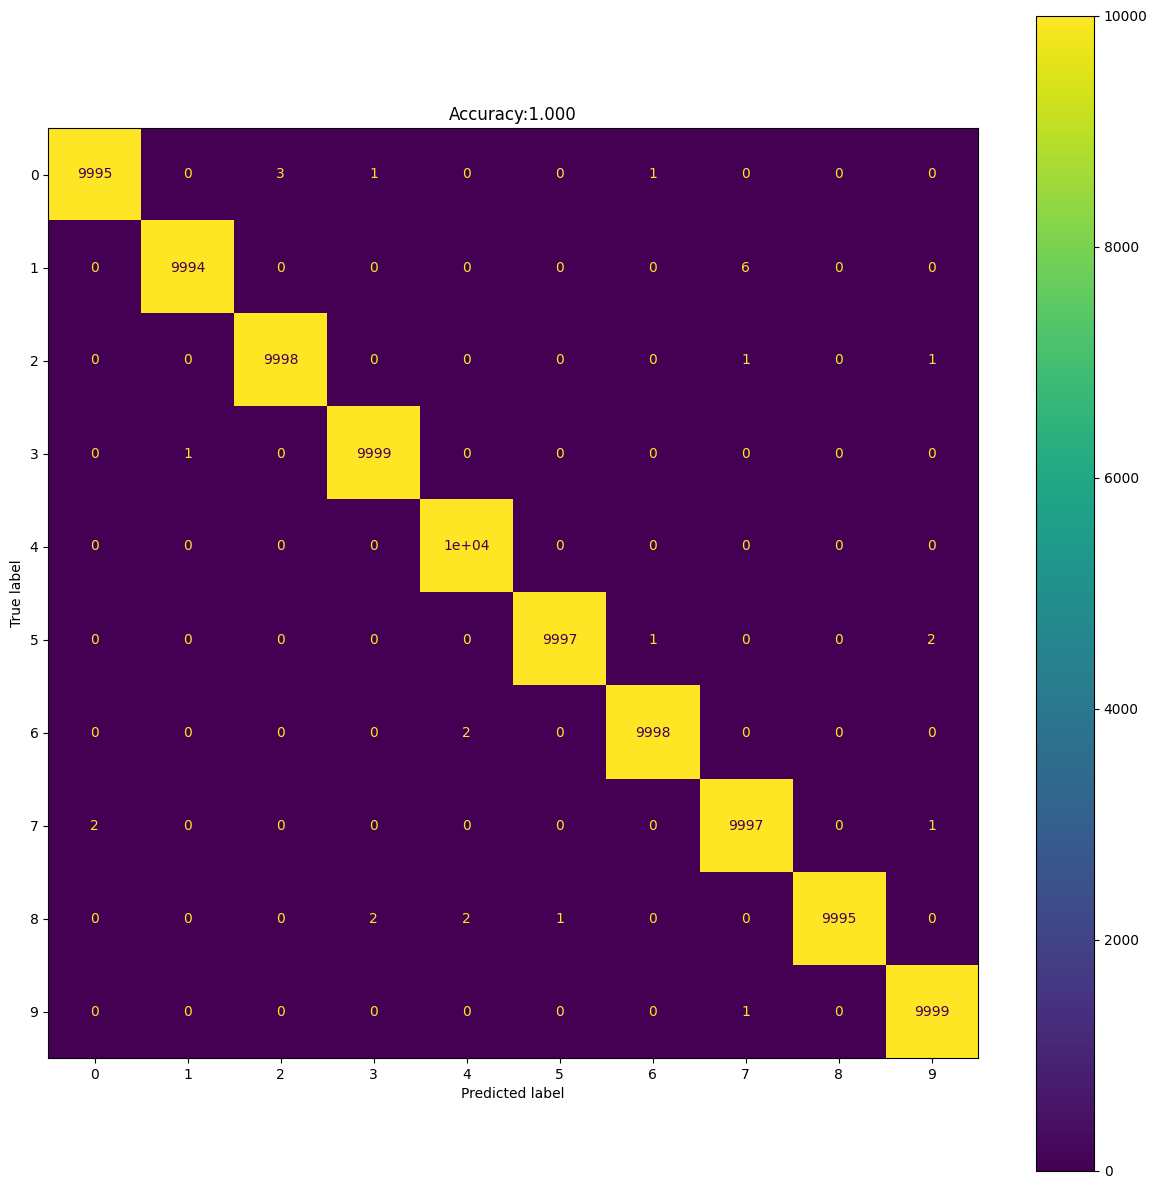

In [23]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')

## iPhone13_III

In [28]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_III/"

    if(i==0):
        data = getData(folder_path + "calendar-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_III.csv', header=False)

[0.015625 +0.j        0.015625 +0.0078125j 0.0234375+0.015625j  ...
 0.       +0.j        0.015625 -0.0078125j 0.0234375+0.015625j ]
2048
78558
(2048, 78558)
[0.01852033 0.00958475 0.00369698 ... 0.00181086 0.003753   0.00963692]
(10000, 2048)
(10000,)
[0.015625 +0.0234375j 0.0078125+0.j        0.0234375+0.j        ...
 0.03125  +0.0078125j 0.0078125+0.015625j  0.0078125+0.0234375j]
2048
74243
(2048, 74243)
[0.01901824 0.00952496 0.00361272 ... 0.00181022 0.00350893 0.00955064]
(20000, 2048)
(20000,)
[0.0234375+0.j        0.0234375+0.0234375j 0.015625 +0.015625j  ...
 0.015625 +0.0078125j 0.015625 +0.j        0.0234375+0.0078125j]
2048
79732
(2048, 79732)
[0.01835802 0.00962685 0.00344502 ... 0.00159603 0.00344605 0.00971396]
(30000, 2048)
(30000,)
[0.015625 +0.j        0.0234375+0.0078125j 0.0078125+0.015625j  ...
 0.       -0.0078125j 0.015625 -0.0078125j 0.03125  +0.0078125j]
2048
72926
(2048, 72926)
[0.01814387 0.00948817 0.00355478 ... 0.00184933 0.0035476  0.0094812 ]
(40000, 204

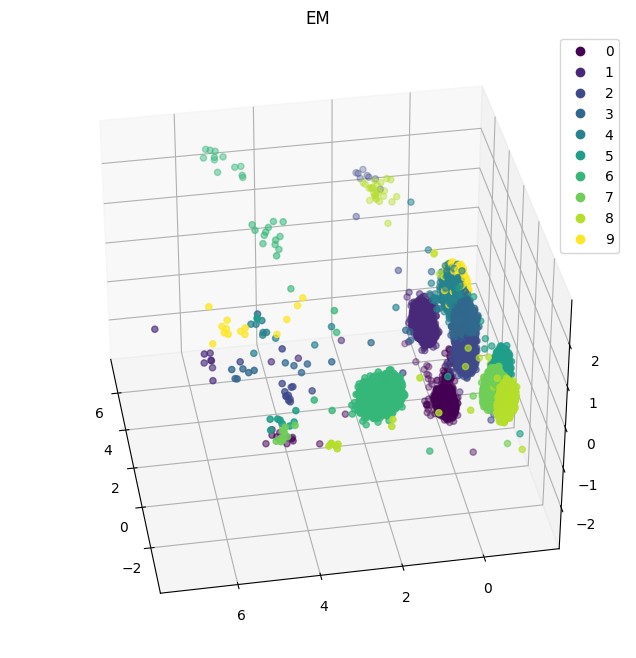

In [29]:
from sklearn.decomposition import PCA

def plot_3d(signal, plot_name, colors, labels, out_path):
    pca = PCA(n_components=3)
    pca_data =pd.DataFrame(pca.fit_transform(signal))
    # visualize in 3d
    fig = plt.figure(figsize=(15,8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    scatter =ax.scatter(pca_data[0],pca_data[1],pca_data[2], c=colors)
    ax.view_init(elev=35, azim=170)
    ax.legend(handles=scatter.legend_elements()[0], loc="best", labels=labels);
    ax.set_title(plot_name);
    plt.savefig(out_path)

# EM scatter
data = em_data
labels = data['labels']
data = data.drop(columns=['labels'])
data = data.dropna(axis='columns')
unique_labels = labels.unique()
labels2colors = {}
classes = []
for i,unique_label in enumerate(unique_labels):
    labels2colors[unique_label] = i
    classes.append(unique_label)
colors = [labels2colors[label] for label in labels]
plot_3d(data,"EM", colors, classes,f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_III_scatter.pdf')

In [49]:
data = pd.read_csv("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_III.csv",comment='#',  index_col=0, header=None, low_memory=False).T
data

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,labels
1,0.422498,0.680489,1.000000,1.000000,1.000000,1.000000,1.000000,0.834423,0.834500,0.718599,...,0.750746,0.763691,0.706715,0.702801,1.000000,1.000000,1.000000,1.000000,0.688021,0.0
2,0.929037,0.853783,0.101921,0.103562,0.092609,0.162482,0.193398,0.074014,0.108654,0.290425,...,0.207853,0.345914,0.340843,0.318369,0.532507,0.323057,0.264786,0.069383,0.906716,0.0
3,0.941623,0.896120,0.060363,0.109833,0.152149,0.140870,0.167666,0.195334,0.330166,0.157229,...,0.330707,0.094808,0.053913,0.247789,0.299523,0.174564,0.114524,0.098097,0.941664,0.0
4,0.815995,0.778228,0.082594,0.182406,0.182273,0.151699,0.245746,0.440105,0.395093,0.148037,...,0.165981,0.312658,0.384464,0.321797,0.246556,0.108866,0.058167,0.007849,0.759296,0.0
5,0.795723,0.751092,0.066276,0.093429,0.039035,0.196214,0.303661,0.279657,0.039834,0.135989,...,0.148099,0.200362,0.209867,0.665128,0.608885,0.243823,0.126856,0.012633,0.760249,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99996,0.933560,0.919221,0.047033,0.261235,0.279359,0.195774,0.183475,0.283673,0.361993,0.348998,...,0.460885,0.377014,0.408991,0.570479,0.268484,0.204830,0.133601,0.076476,0.872792,9.0
99997,0.934426,0.901555,0.070696,0.132777,0.059176,0.141208,0.211734,0.377847,0.519662,0.149129,...,0.460394,0.466287,0.498449,0.352417,0.317433,0.098610,0.067554,0.084241,0.933651,9.0
99998,0.931663,0.928754,0.052643,0.049096,0.182915,0.404265,0.275208,0.169362,0.230368,0.422917,...,0.209413,0.551867,0.383992,0.296554,0.436850,0.254137,0.051285,0.090958,0.899035,9.0
99999,0.931983,0.908526,0.003918,0.074554,0.328282,0.291110,0.172624,0.133035,0.114316,0.128454,...,0.231542,0.236621,0.260887,0.375407,0.268695,0.193573,0.293027,0.146010,0.887647,9.0


In [50]:
Y = labels = np.array(data['labels'])
X = data = np.array(data.drop(columns=['labels']))

In [30]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_combined/iPHONE13_II&III_model.h5")

In [31]:
results = model.evaluate(X, Y)
print("test loss, test acc:", results)

3125/3125 [==============================] - 13s 4ms/step - loss: 0.0028 - accuracy: 0.9997
test loss, test acc: [0.0028209539595991373, 0.9997000098228455]


In [32]:
y_pred = np.argmax(model.predict(X), axis=-1)
print(y_pred)
print(y_pred[0])

3125/3125 [==============================] - 11s 4ms/step
[0 0 0 ... 9 9 9]
0


In [33]:
print(confusion_matrix(Y, y_pred))
print(classification_report(Y, y_pred))

[[ 9999     0     1     0     0     0     0     0     0     0]
 [    0  9999     0     0     0     0     0     1     0     0]
 [    0     0  9999     1     0     0     0     0     0     0]
 [    0     0     0  9999     0     1     0     0     0     0]
 [    0     1     0     1  9998     0     0     0     0     0]
 [    0     0     0     0     0  9999     0     0     0     1]
 [    1     0     1     1     0     0  9994     1     2     0]
 [    0     0     0     0     0     0     0 10000     0     0]
 [    0     0     0     1     5     0     4     1  9988     1]
 [    0     1     0     0     0     0     4     0     0  9995]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       1.00      1.00      1.00     10000
           5       1.00      1.00      1.00 

Test Accuracy:0.9997


Text(0.5, 1.0, 'Accuracy:1.000')

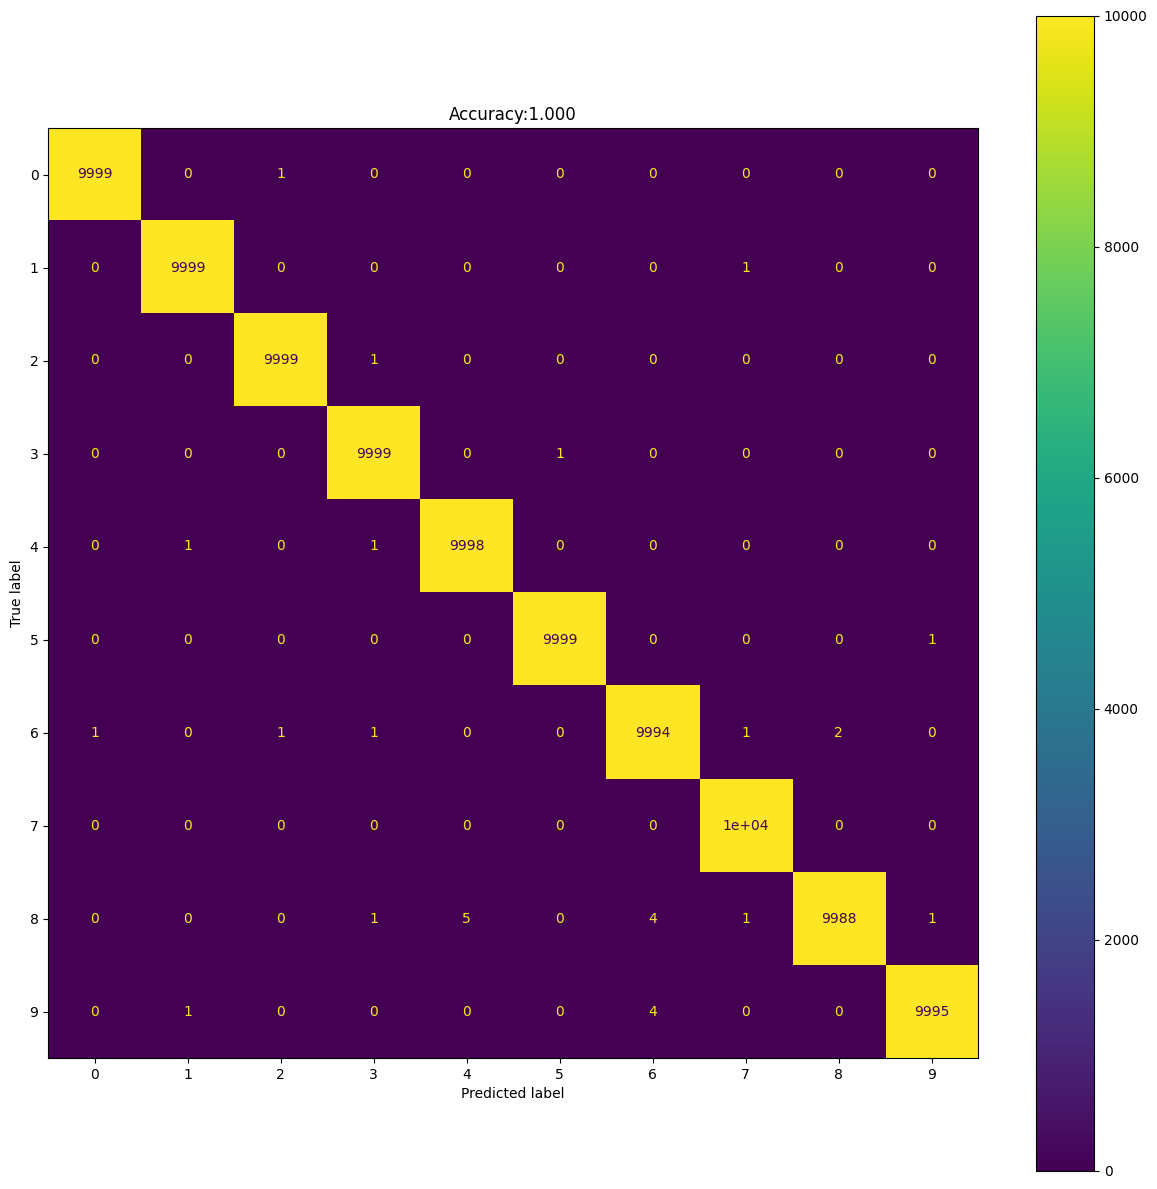

In [34]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,Y)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(Y, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_III_confusion_matrix.pdf')